## The Seventh Lab-assignment (08/05/2022 11:59'AM' - 08/09/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand how to conduct Sampling and Distributions. The data used in this lab assignment will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com). The dataset of this assignment can be downloaded from github: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab-assignment-7

First, set up the tests and imports by running the cell below.

In [1]:
# Install the required package
!pip install datascience

  Created wheel for datascience: filename=datascience-0.17.5-py3-none-any.whl size=732546 sha256=e5c15a0ca079cc963e4bf5a0c55bbb93a81cd8c66a07dbab67d76e32dc771134
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\74\0a\88\e52ce8c2533663326372f4be6eba170267fb70dc6252234186
Successfully built datascience


In [110]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Run the cell below to load player and salary data that we will use for our sampling.

In [111]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the histograms function below, which takes a table with columns Age and Salary and draws a histogram for each one. It uses bin widths of 1 year for Age and $1,000,000 for Salary.

Two histograms should be displayed below


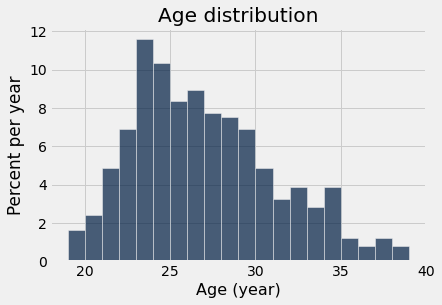

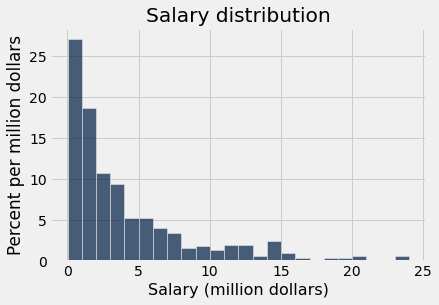

In [81]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
# print(full_data)
histograms(full_data)
print('Two histograms should be displayed below')

### Question 1 (10 points) 

Create a function called compute_statistics that takes a table containing ages and salaries and:

(1) Draws a histogram of ages

(2) Draws a histogram of salaries

(3) Returns a two-element array containing the average age and average salary (in that order)


You can call the histograms function to draw the histograms!

Note: More charts will be displayed when running the test cell. Please feel free to ignore the charts.

array([  2.65365854e+01,   4.26977577e+06])

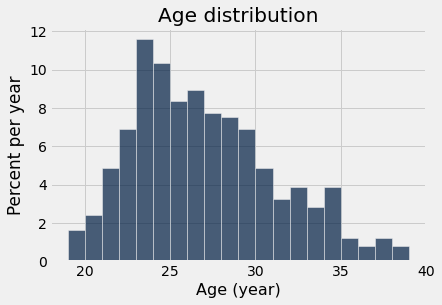

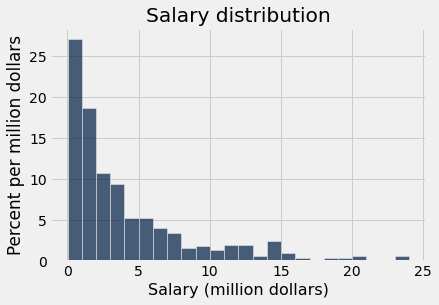

In [82]:
### You code here

def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age=age_and_salary_data.column('Age')
    salary=age_and_salary_data.column('Salary')
    return np.array([np.mean(age),np.mean(salary)])

full_stats = compute_statistics(full_data)
full_stats



In [60]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[0]), 2) == 26.54



True

In [61]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[1]), 2) == 4269775.77



True

### Question 2 (10 points) Convenience sampling

One sampling methodology, which is generally a bad idea, is to choose players who are somehow convenient to sample. For example, you might choose players from one team who are near your house, since it's easier to survey them. This is called, somewhat pejoratively, convenience sampling.

Suppose you survey only relatively new players with ages less than 22. (The more experienced players didn't bother to answer your surveys about their salaries.)

Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [99]:
### You code here:
import pandas as pd
f_data=pd.read_csv('player_data.csv')
f=pd.read_csv('salary_data.csv')
full_data=f_data.join(f)
# print(full_data)
# full_data = salary_data.join("PlayerName", player_data, "Name")
convenience_sample = full_data.loc[full_data['Age']<22]
convenience_sample





,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,PlayerName,Salary
3,Anthony Davis,21,NOP,68,696,149,100,200,95,1656,Carmelo Anthony,22458401
29,Andre Drummond,21,DET,82,1104,55,73,153,120,1130,DeMarcus Cousins,14746000
52,Giannis Antetokounmpo,20,MIL,81,542,207,73,85,173,1030,DeAndre Jordan,11440124
100,Steven Adams,21,OKC,70,523,66,38,86,99,537,J.J. Redick,6792500
112,Nerlens Noel,20,PHI,75,611,128,133,142,146,744,Kyle Korver,6253521
123,Michael Kidd-Gilchrist,21,CHO,55,416,77,30,38,63,598,Enes Kanter,5694674
125,Bradley Beal,21,WAS,63,241,194,76,18,123,962,Anthony Bennett,5563920
153,Alex Len,21,PHO,69,454,32,34,105,74,432,Timofey Mozgov,4650000
172,Marcus Smart,20,BOS,67,222,208,99,18,90,523,Vince Carter,3911981
175,Kentavious Caldwell-Pope,21,DET,82,255,109,93,18,94,1043,Bismack Biyombo,3873398


In [101]:
# TEST
convenience_sample.value_counts() == 11



Name                      Age  Team  Games  Rebounds  Assists  Steals  Blocks  Turnovers  Points  PlayerName                Salary  
Aaron Gordon              19   ORL   47     169       33       21      22      38         243     Jared Sullinger           1424520     False
Alex Len                  21   PHO   69     454       32       34      105     74         432     Timofey Mozgov            4650000     False
Jordan Adams              20   MEM   30     28        16       16      7       14         94      Xavier Henry              1082000     False
Julius Randle             20   LAL   1      0         0        0       0       1          2       Jordan Hamilton           150591      False
Jusuf Nurkic              20   DEN   62     382       50       52      68      86         426     Beno Udrih                2077000     False
K.J. McDaniels            21   TOT   62     200       72       44      70      105        487     Tony Wroten               1210080     False
Kentavious Cald

In [102]:
# TEST
convenience_sample.value_counts() == 44



Name                      Age  Team  Games  Rebounds  Assists  Steals  Blocks  Turnovers  Points  PlayerName                Salary  
Aaron Gordon              19   ORL   47     169       33       21      22      38         243     Jared Sullinger           1424520     False
Alex Len                  21   PHO   69     454       32       34      105     74         432     Timofey Mozgov            4650000     False
Jordan Adams              20   MEM   30     28        16       16      7       14         94      Xavier Henry              1082000     False
Julius Randle             20   LAL   1      0         0        0       0       1          2       Jordan Hamilton           150591      False
Jusuf Nurkic              20   DEN   62     382       50       52      68      86         426     Beno Udrih                2077000     False
K.J. McDaniels            21   TOT   62     200       72       44      70      105        487     Tony Wroten               1210080     False
Kentavious Cald

### Question 3 (10 points) 

Assign convenience_stats to an array of the average age and average salary of your convenience sample, using the compute_statistics function. Since they're computed on a sample, these are called sample averages.

In [103]:
mean_age=convenience_sample['Age'].mean()
full_data2=pd.read_csv('salary_data.csv')
convenience_sample2 = full_data2
mean_salary=convenience_sample2['Salary'].mean()

convenience_stats = np.array([mean_age,mean_salary])
convenience_stats



array([  2.03636364e+01,   4.26977577e+06])

In [104]:
# TEST
len(convenience_stats) == 2



True

In [105]:
# TEST 
round(float(convenience_stats[0]), 2) == 20.36



True

In [106]:
# TEST
round(float(convenience_stats[1]), 2) == 2383533.82



False

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the bin_column option of the hist method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; just run it.

In [136]:
def compare_salaries(first, second, first_title, second_title):
#     print(first)
#     print(second)
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')


compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

AttributeError: 'DataFrame' object has no attribute 'column'

### Question 4 (10 points) 
Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general? Before you move on, write a short answer in English below. You can refer to the statistics calculated above or perform your own analysis.

In [2]:
### Please write your answer here (no code required)
# Results are calaucted manually as tried different approach to compare the salaries.
"""
Answer: 
The Convience sample gave us not so accurate picture of slaary of full population,Based on the stats caluclated from sample we
found that few showed accurate results as of sample.The mean calaucted was biased to lower side of sample than covering the 
weighed average of the samples.

"""

'\nAnswer: \n\n\n\n'

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [119]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Dante Exum,3615000
Evan Fournier,1483920
Jusuf Nurkic,1762680
Landry Fields,6250000
Kevin Seraphin,3898692


The optional argument with_replacement=False can be passed through sample() to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to sample() with a sample size of 5, without replacement.

In [120]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Shannon Brown,1310286
Jack Cooley,65000
Kevin Durant,18995624
Jason Richardson,6601125
Carmelo Anthony,22458401


### Question 5 (10 points) 
Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

In [153]:
full_data2=pd.read_csv('full_data.csv')

my_small_srswor_data = full_data2.sample(n=44)
avg_age=my_small_srswor_data['Age'].mean()
avg_sal=my_small_srswor_data['Salary'].mean()
my_small_stats =np.array([avg_age,avg_sal])
my_small_stats

array([  2.58181818e+01,   5.00297820e+06])

Before you move on, write a short answer for the following questions in English:

(1) How much does the average age change across samples?

(2) What about average salary?

In [141]:
### Please write your answer here (no code required)
"""
Answer: 
The avergae change chnage across the random sample is around plus or minus 0.1-0.2

When tried on differnt samples generted from differnt executions,The mean was falling in betwwen 2.03 to 5.88
"""

'\nAnswer: \n\n\n'

### Question 6 (15 points) - Optional/ Additional extra credit if you loose marks on above questions
As in the previous question, analyze several simple random samples of size 100 from `full_data`.  

In [162]:
my_large_srswor_data = full_data2.sample(n=100)
avg_age=my_small_srswor_data['Age'].mean()
avg_sal=my_small_srswor_data['Salary'].mean()
my_large_stats = np.array([avg_age,avg_sal])
my_large_stats

array([  2.58181818e+01,   5.00297820e+06])

<AxesSubplot:>

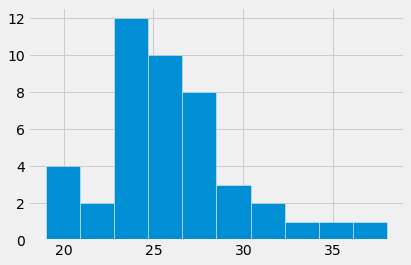

In [170]:
my_small_srswor_data["Age"].hist()


<AxesSubplot:>

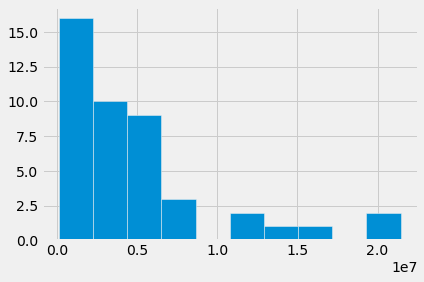

In [171]:
 my_small_srswor_data['Salary'].hist()


<AxesSubplot:>

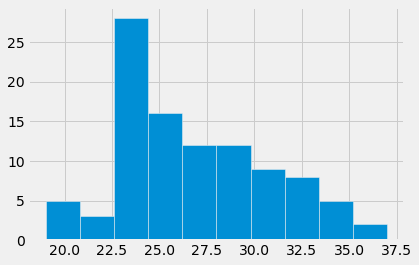

In [172]:
my_large_srswor_data['Age'].hist()

<AxesSubplot:>

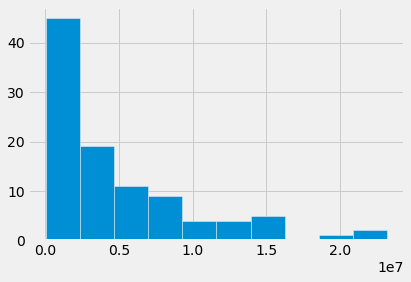

In [173]:
my_large_srswor_data['Salary'].hist()

Answer the following questions in English:

(1) Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?

(2) Are the sample averages and histograms closer to their true values/shape for age or for salary? What did you expect to see?

In [169]:
### Please write your answer here (no code required)

"""
Answer: 
The shape of the hist remains mostly the same when plotted for sample 100 and sample 44 but the ranges differ slightly for each 
size of smapling

The avergae calauclsted were a little closer to the actual or true value for age and little more aligned towards closer value is observed 
in case of slaary.Have expected much more accurate results than the one caluclated.



"""

'\nAnswer: \n\n\n\n'